# SVM Cancer Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
data=datasets.load_breast_cancer()

In [2]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [3]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
data.data.shape

(569, 30)

In [5]:
x=pd.DataFrame(data.data,columns=data.feature_names)

In [6]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y=pd.DataFrame(data.target,columns=['Target'])

In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Target  569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [10]:
data=pd.concat([x,y],axis=1)

In [11]:
data.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0


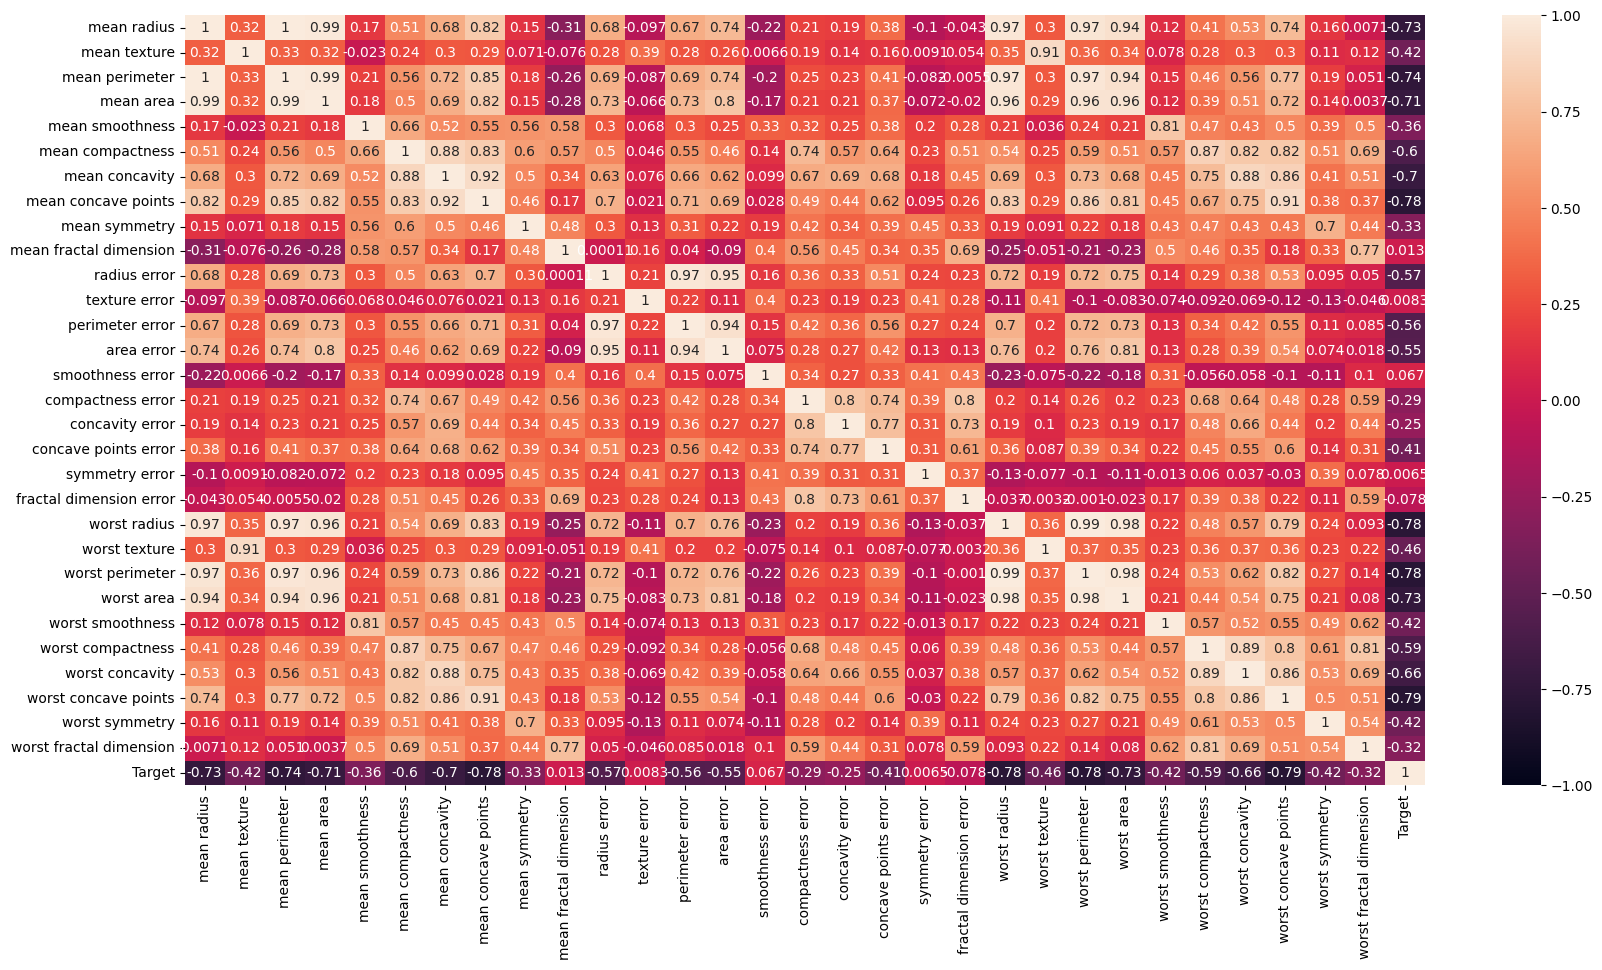

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)
plt.show()

In [16]:
#univarite
from sklearn.feature_selection import SelectKBest, f_regression

df = data.iloc[:,:]

result_df = pd.DataFrame(columns=['column_name', 'score'])

# Loop over all columns in the dataframe
for col_name in df.columns:
    X = df[[col_name]]
    y = df['Target']

    # Apply univariate feature selection to the current column
    selector = SelectKBest(score_func=f_regression, k=1)
    selector.fit(X, y)

    # Get the score of the selected feature
    score = selector.scores_[0]

    new_data = {'column_name': [col_name], 'score': [score]}
    new_df = pd.DataFrame(data=new_data)
    result_df = pd.concat([result_df, new_df], ignore_index=True)


result_df = result_df.sort_values(by='score', ascending=False)

<ipython-input-16-25856f989a27>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, new_df], ignore_index=True)


In [17]:
result_df

,column_name,score
30,Target,8.511803e+17
27,worst concave points,9.643854e+02
22,worst perimeter,8.979442e+02
7,mean concave points,8.616760e+02
20,worst radius,8.607817e+02
2,mean perimeter,6.972353e+02
23,worst area,6.616002e+02
0,mean radius,6.469810e+02
3,mean area,5.730607e+02
6,mean concavity,5.337931e+02


In [18]:
drop_columns=result_df.column_name[-5:]

In [19]:
x.drop(columns=drop_columns,axis=1,inplace=True)

In [20]:
x.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'radius error',
       'perimeter error', 'area error', 'compactness error', 'concavity error',
       'concave points error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [21]:
data.drop(columns=drop_columns,axis=1,inplace=True)

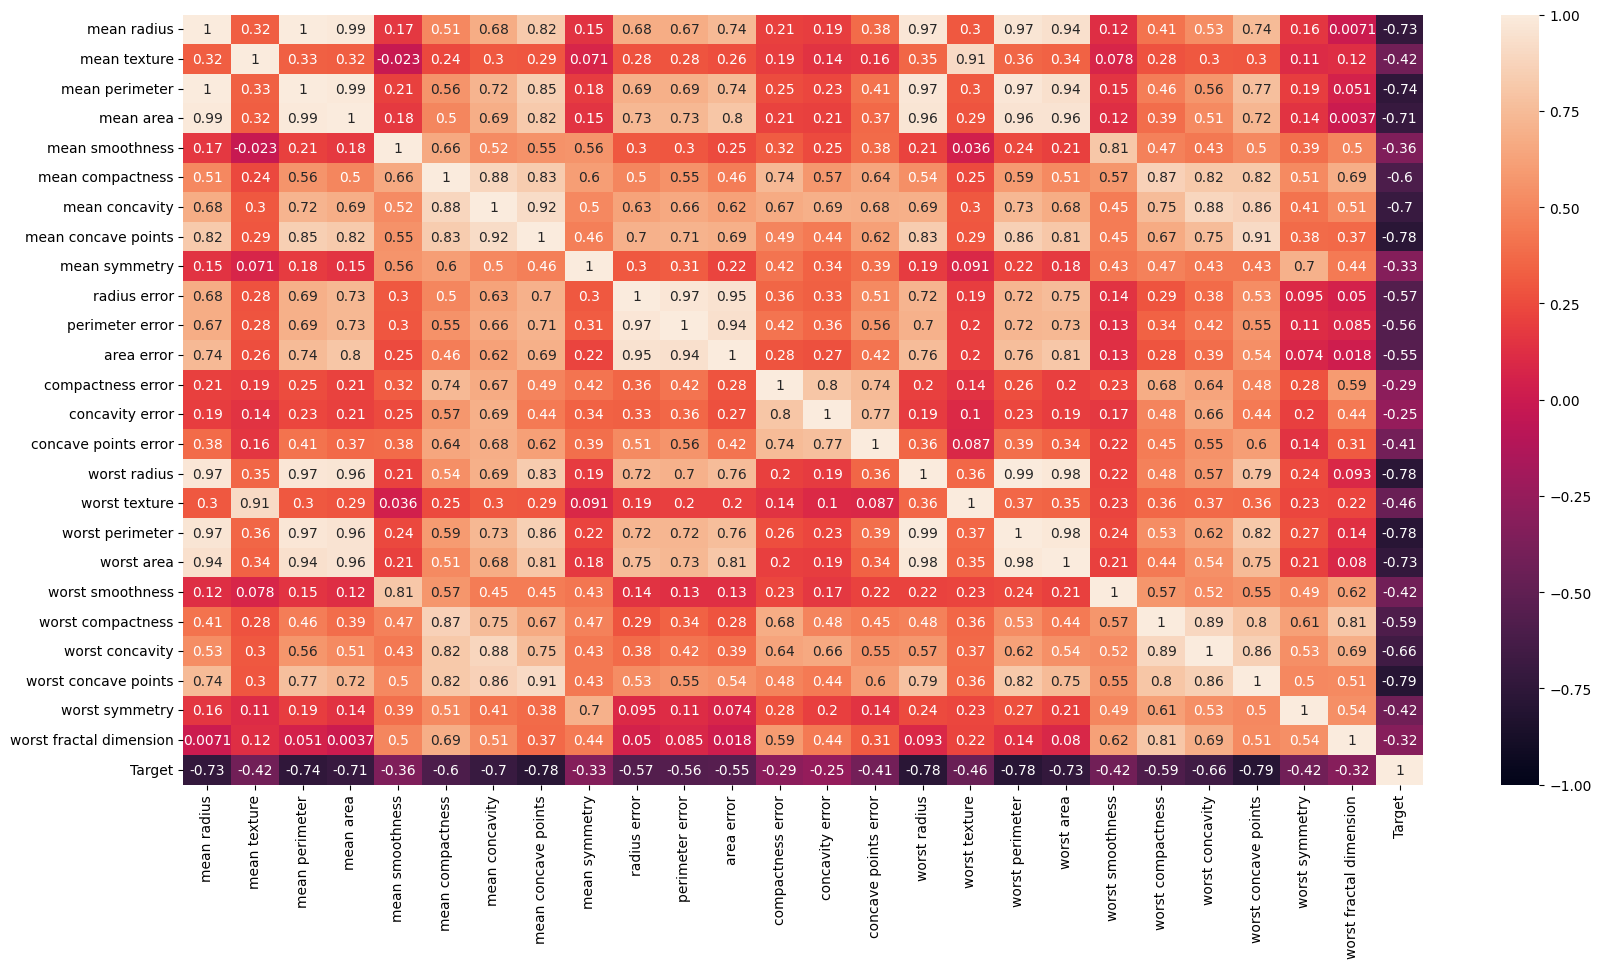

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)
plt.show()

#### univariate feature selection

In [23]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, thresh=6.0):
    dropped = True
    while dropped:
        variables = df.columns
        dropped = False
        vif = [variance_inflation_factor(df[variables].values, df.columns.get_loc(var)) for var in variables]

        max_vif = max(vif)
        if max_vif > thresh:
            max_vif_index = vif.index(max_vif)
            df = df.drop(variables[max_vif_index], axis=1)
            dropped = True

    return df

df_vif = calculate_vif(x)
df_vif.columns

Index(['area error', 'concavity error', 'worst texture', 'worst concavity'], dtype='object')

In [24]:
x.drop(columns=df_vif.columns,axis=1,inplace=True)

In [ ]:
x.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'radius error',
       'perimeter error', 'compactness error', 'concave points error',
       'worst radius', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concave points', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object')

In [ ]:
data.drop(columns=df_vif.columns,axis=1,inplace=True)

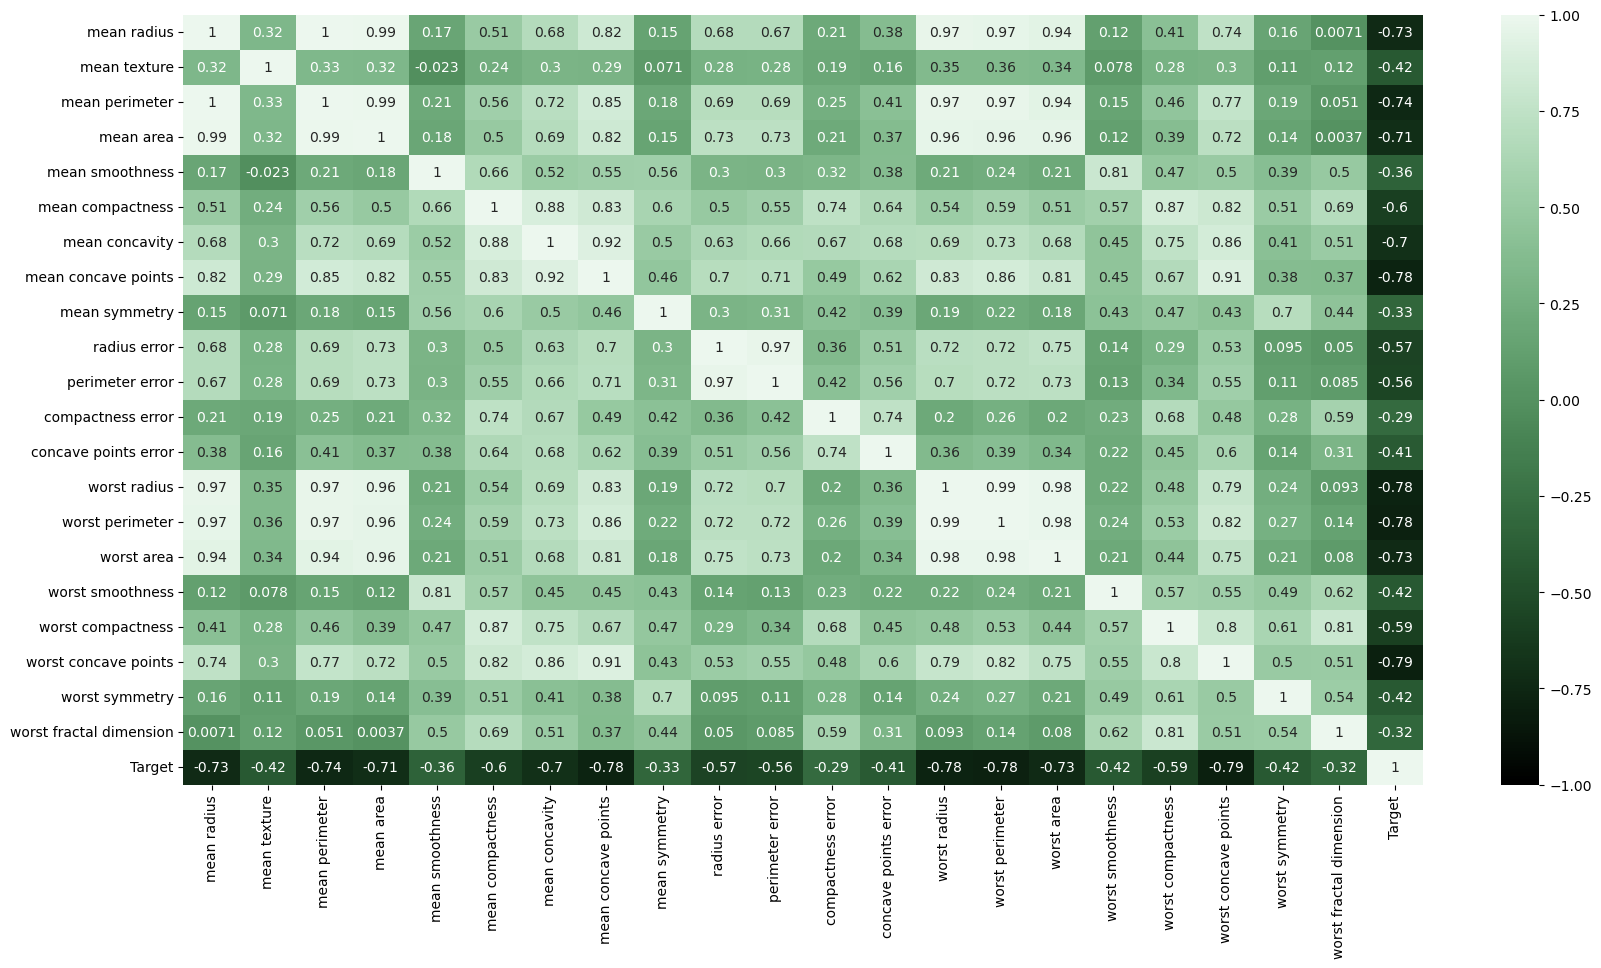

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,
            cmap=sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True),vmax=1,vmin=-1)
plt.show()

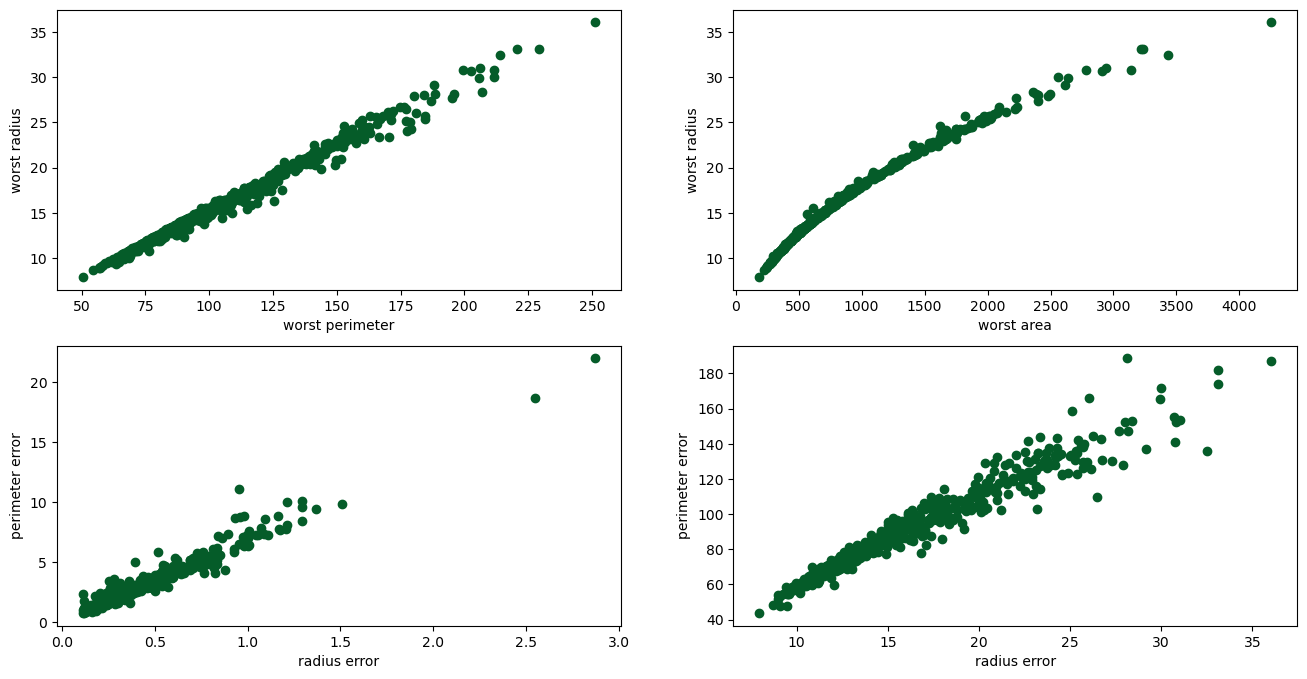

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.scatter(data['worst perimeter'],data['worst radius'],c='#055C29')
plt.xlabel('worst perimeter')
plt.ylabel('worst radius')

plt.subplot(2,2,2)
plt.scatter(data['worst area'],data['worst radius'],c='#055C29')
plt.xlabel('worst area')
plt.ylabel('worst radius')

plt.subplot(2,2,3)
plt.scatter(data['radius error'],data['perimeter error'],c='#055C29')
plt.xlabel('radius error')
plt.ylabel('perimeter error')

plt.subplot(2,2,4)
plt.scatter(data['worst radius'],data['mean perimeter'],c='#055C29')
plt.xlabel('radius error')
plt.ylabel('perimeter error')

plt.show()

here many high corrilated columns so we can't find and drop

#### train test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=109)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((455, 21), (114, 21), (455,), (114,))

In [ ]:
from sklearn import svm
cancer=svm.SVC(kernel='linear')

#train our model
cancer.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
#predicting
y_pred=cancer.predict(x_test)

#### Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred),'\n \n')
print(classification_report(y_test,y_pred))

[[40  0]
 [ 3 71]] 
 

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       1.00      0.96      0.98        74

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



In [ ]:
cm=confusion_matrix(y_test,y_pred)

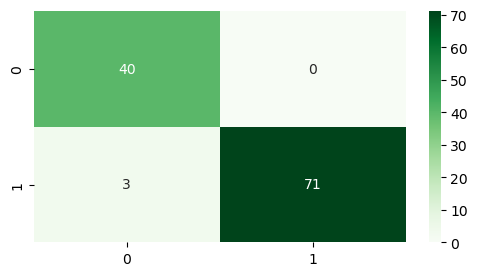

In [ ]:
plt.figure(figsize=(6,3))
sns.heatmap(cm,annot=True,
            cmap='Greens')
plt.show()